In [1]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df = pd.read_csv("data/train.csv", index_col=0)

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
survived = sum(df.Survived == 1)
died = sum(df.Survived == 0)

([], [])

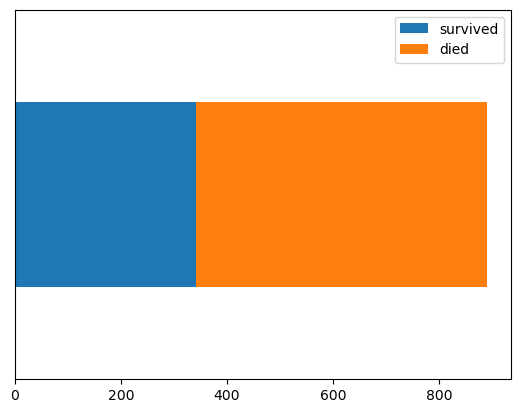

In [22]:
first = pd.DataFrame([[survived, died]], columns = ['survived', 'died'])
first.plot.barh(stacked = True)
plt.yticks([])

In [15]:
len(df[df['Pclass'] == 1].Survived == 1)

216

In [20]:
classes = pd.DataFrame(index = ['1st', '2nd', '3rd'], columns = ['Survived', 'Died'])
for pclass in (1,2,3):
    classes.iloc[pclass-1]['Survived'] = sum(df[df['Pclass'] == pclass].Survived == 1)
    classes.iloc[pclass-1]['Died'] = sum(df[df['Pclass'] == pclass].Survived == 0)

,Survived,Died
1st,136,80
2nd,87,97
3rd,119,372


In [34]:
classes['Survival rate'] = classes.Survived / (classes.Survived + classes.Died)

In [35]:
classes

,Survived,Died,Survival rate
1st,136,80,0.62963
2nd,87,97,0.472826
3rd,119,372,0.242363


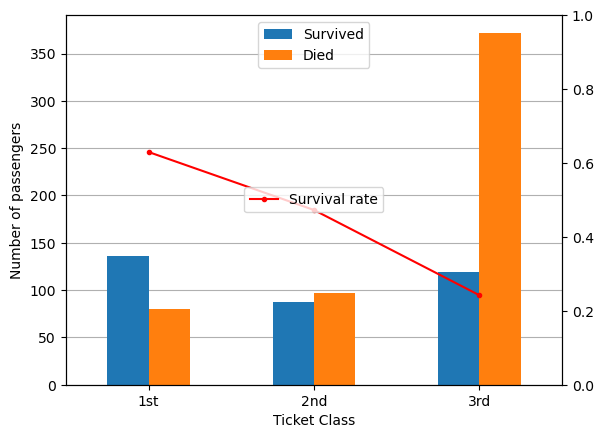

In [46]:
ax = classes[['Survived', 'Died']].plot.bar(stacked = False)
ax.set_xticklabels(classes.index, rotation = 0)
ax.legend(loc = 'upper center')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Number of passengers')
ax.set_axisbelow(True)
ax.grid(axis = 'y')

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), classes['Survival rate'], '.-', c='r', label = 'Survival rate')
ax2.set_ylim([0,1])
ax2.legend(loc = 'center')